In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score


In [3]:
df=pd.read_csv("C:\\Users\\admin\\Downloads\\archive (1)\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.isnull().sum()


Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [8]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [9]:
df_x=df
df_y=df['Outcome']
df_y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
def RemoveOutliers(df,var):
 Q1 = df[var].quantile(0.25)
 Q3 = df[var].quantile(0.75)
 IQR = Q3 - Q1
 high, low = Q3+1.5*IQR, Q1-1.5*IQR
 print("Highest allowed in variable:", var, high)
 print("lowest allowed in variable:", var, low)
 count = df[(df[var] > high) | (df[var] < low)][var].count()
 print('Total outliers in:',var,':',count)
 df = df[((df[var] >= low) & (df[var] <= high))]
 return df

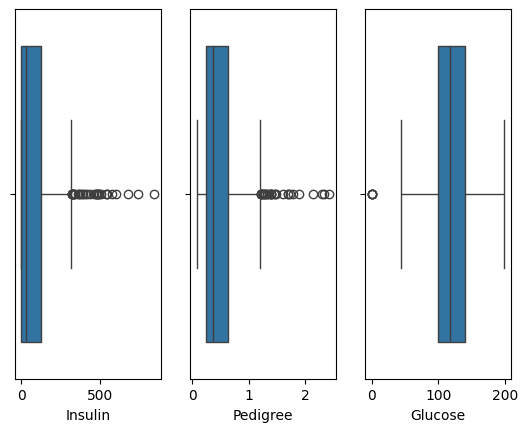

In [11]:

fig,axes=plt.subplots(1,3)

sns.boxplot(data=df,x='Insulin',ax=axes[0])
sns.boxplot(data=df,x='Pedigree',ax=axes[1])
sns.boxplot(data=df,x='Glucose',ax=axes[2])
plt.show()


In [12]:
df=RemoveOutliers(df,'Insulin')
df=RemoveOutliers(df,'Pedigree')

Highest allowed in variable: Insulin 318.125
lowest allowed in variable: Insulin -190.875
Total outliers in: Insulin : 34
Highest allowed in variable: Pedigree 1.1695000000000002
lowest allowed in variable: Pedigree -0.3125000000000001
Total outliers in: Pedigree : 31


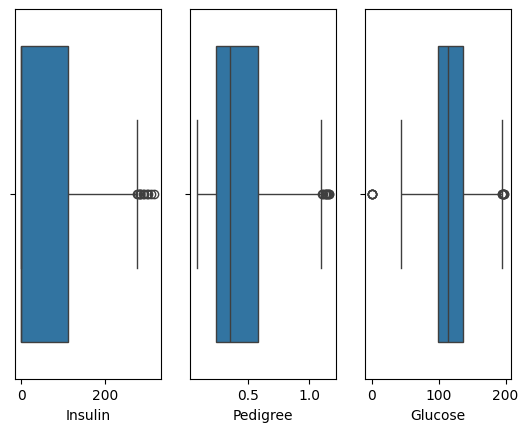

In [13]:

fig,axes=plt.subplots(1,3)

sns.boxplot(data=df,x='Insulin',ax=axes[0])
sns.boxplot(data=df,x='Pedigree',ax=axes[1])
sns.boxplot(data=df,x='Glucose',ax=axes[2])
plt.show()


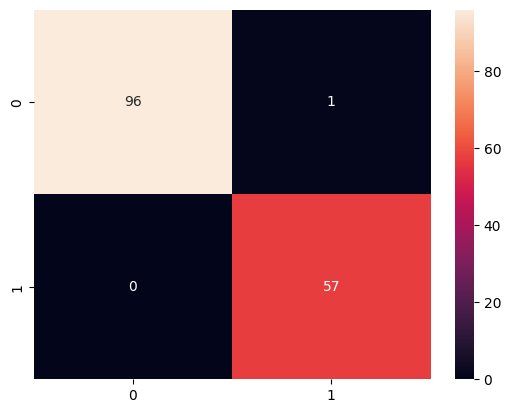

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       0.98      1.00      0.99        57

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(df_x,df_y,test_size=0.20,random_state=13)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()
print(classification_report(ytest,ypred))

In [21]:
accuracy = accuracy_score(ytest, ypred) 
precision = precision_score(ytest, ypred) 
recall = recall_score(ytest, ypred) 
error_rate = 1 - accuracy 

print(f"Accuracy: {accuracy * 100:.2f}%") 
print(f"Error Rate: {error_rate * 100:.2f}%") 
print(f"Precision: {precision * 100:.2f}%") 
print(f"Recall: {recall * 100:.2f}%") 

Accuracy: 99.35%
Error Rate: 0.65%
Precision: 98.28%
Recall: 100.00%


In [24]:
#Loop through different values of K to check the impact of k on accuracy 

print("\nEvaluating different values of k for better performance:") 
for k in range(1, 11): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(xtrain, ytrain) 
    ypred = knn.predict(xtest) 
    accuracy = accuracy_score(ytest, ypred) 
    print(f"K = {k}, Accuracy = {accuracy * 100:.2f}%") 

 


Evaluating different values of k for better performance:
K = 1, Accuracy = 99.35%
K = 2, Accuracy = 100.00%
K = 3, Accuracy = 100.00%
K = 4, Accuracy = 100.00%
K = 5, Accuracy = 99.35%
K = 6, Accuracy = 100.00%
K = 7, Accuracy = 100.00%
K = 8, Accuracy = 100.00%
K = 9, Accuracy = 100.00%
K = 10, Accuracy = 100.00%
